In [1]:
### Evaluacion de la ciclica de acuerdo a la fecha
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
import pandas as pd
pd.options.display.max_columns = None
from datetime import timedelta
import glob as glob
import warnings
import os
import sys
warnings.filterwarnings("ignore", category=FutureWarning)
path="//10.1.1.7/01 Oficina Planeación y Control/01 Analytics/Stiven/Cobranzas/"
import zipfile
import seaborn as sns
now=dt.datetime.now().strftime('%Y%m%d')
now2=dt.datetime.now().strftime('%Y-%m-%d')
today = dt.date.today()
hoy=now
def condition():
    if today.strftime("%A")=='Monday':
        return (today - dt.timedelta(days=2)).strftime('%Y%m%d')
    else:
        return (today - dt.timedelta(days=1)).strftime('%Y%m%d')
yesterday=condition()
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
os.chdir(path)
os.getcwd()

'\\\\10.1.1.7\\01 Oficina Planeación y Control\\01 Analytics\\Stiven\\Cobranzas'

In [2]:
############################################ Funciones para cargue  ########################################################
def open_files_hoy(paths):
        data = []
        for path1 in paths:
            zf = zipfile.ZipFile(path1)#Función de apertura de .zip
            data.append(pd.read_csv(#Función de lectura paralelizada
                        zf.open(zf.filelist[0].filename),#Abre el primer archivo del .zip
                        sep = "|", ## separación del archivo CSV
                        encoding = "utf-8",
                        dtype=str ## Leo todo en formato object,
                        )
                    )
        print(path,"Cargado!")
        return pd.concat(data,ignore_index = True)

In [3]:
path="Y:/Stiven/Movil/Cobranzas_movil_(Despliegue)/Download_folder_Adminfo/{}_IGC.zip".format(now)

In [4]:
igc = open_files_hoy([path]) 

Y:/Stiven/Movil/Cobranzas_movil_(Despliegue)/Download_folder_Adminfo/20211229_IGC.zip Cargado!


In [5]:
igc["ESTATUS1"] =\
    np.where(igc["Número Traslado"].str.contains("23213|23214|23619",regex = True,na = False),"B2B MOVIL","B2C MOVIL")
igc['Fecha Asignación']=pd.to_datetime(igc['Fecha Asignación'],format='%Y-%m-%d',errors='coerce')
igc['Fecha Ultima Gestión ']=pd.to_datetime(igc['Fecha Ultima Gestión '],format='%Y-%m-%d',errors='coerce')
igc['DIAS SIN GESTION']=(dt.datetime.now()-igc['Fecha Ultima Gestión ']).dt.days

# igc=igc[consolidado_ig.columns]
igc['Fecha Asignación']=pd.to_datetime(igc['Fecha Asignación'],format='%Y-%m-%d')
igc=igc.sort_values(['Identificación','Referencia Pago','Fecha Asignación'],ascending=True)
igc['llave']=igc['Referencia Pago']+"_"+igc['Fecha Asignación'].astype(str)
igc.drop_duplicates(['llave'],keep='last',inplace=True)
igc['Fecha Churn']=igc['Fecha Churn'].astype(str)
igc['Fecha Churn']=igc['Fecha Churn'].str.replace('(.*)\s.*', '\\1').str.replace('-','')
igc['Fecha Churn']=pd.to_datetime(igc['Fecha Churn'],format='%Y%m%d',errors='coerce')
igc['Marca Portafolio']=igc['Marca Portafolio'].str.strip()
igc['Antiguedad de Producto']=igc['Antiguedad de Producto'].str.replace('AntiguÃ³','Antigua').str.replace('En MaduraciÃ³n','En maduración')
igc['Fecha Asignación']=igc['Fecha Asignación'].astype(str).str.replace('(.*)\s.*', '\\1').str.replace('-','')
igc['Fecha Asignación']=pd.to_datetime(igc['Fecha Asignación'],format='%Y-%m-%d',errors='coerce')
igc['Fecha Asignación_año_mes']=(igc['Fecha Asignación'].dt.year).astype(str) +"_"+ (igc['Fecha Asignación'].dt.month).astype(str)
igc['Fecha Ultima Gestión ']=pd.to_datetime(igc['Fecha Ultima Gestión '],format='%Y-%m-%d',errors='coerce')
igc['Fecha Creación de Cuenta']=pd.to_datetime(igc['Fecha Creación de Cuenta'],format='%Y-%m-%d',errors='coerce')
igc['meses_desde_creacion']=(igc['Fecha Ultima Gestión ']-igc['Fecha Creación de Cuenta']).dt.days/365
igc['Fecha Actualizacion']=pd.to_datetime(igc['Fecha Actualizacion'],format='%Y-%m-%d',errors='coerce')
igc['DIAS SIN GESTION_act']=(igc['Fecha Actualizacion']-igc['Fecha Ultima Gestión ']).dt.days
igc['DIAS SIN GESTION_act']=np.where(igc['DIAS SIN GESTION_act'] > igc['DIAS SIN GESTION_act'].quantile(0.95),  igc['DIAS SIN GESTION_act'].quantile(0.95),igc['DIAS SIN GESTION_act'])
# ig=igc[igc['Fecha Asignación']>='2021-03-01']
igc=igc[~igc.duplicated()]
igc['Valor a Cobrar']=igc['Valor a Cobrar'].astype(float)
igc['Fecha Asignación']=pd.to_datetime(igc['Fecha Asignación'],format='%Y-%m-%d',errors='coerce')
igc['Fecha Asignación_año_mes']=(igc['Fecha Asignación'].dt.year).astype(str) +"_"+ (igc['Fecha Asignación'].dt.month).astype(str)
igc['Fecha Ultima Gestión ']=pd.to_datetime(igc['Fecha Ultima Gestión '],format='%Y-%m-%d',errors='coerce')
igc['Fecha Creación de Cuenta']=pd.to_datetime(igc['Fecha Creación de Cuenta'],format='%Y-%m-%d',errors='coerce')
igc['meses_desde_creacion']=(igc['Fecha Ultima Gestión ']-igc['Fecha Creación de Cuenta']).dt.days/365

In [6]:
igc['Honorarios']=pd.to_numeric(igc['Honorarios'],errors='coerce')
igc.drop(['Facturación Credivalores','Region','Codigo regional tigo','Desconciliada','Regional', 'Estado Plan',
        'FLP','Grabador Gestión Masiva','Estado Adminfo','Observacion Adicional','Nombre Cliente','Consecutivo Obligación',
        'Fecha Gestión Masiva','Valor Cuota','Gastos Cobranza Credivalores','Segmentacion B2B','Segmento Asesor Corporativo','Riesgo Habito de Pago',
        'Cliente Convergente','Billing Status','Fecha Castigo','Estado Financiación','Plan','Gerencia Convergente','Corriente',
        'Subsegmento B2B','Inmunidad B2B','Fecha de suspensión decreto','Segmento','Tarea Usuario',
    'Código departamento','Ciudad','Pago Ajuste No Alocado','Nombre Campaña Especial','Mejor Codigo de Gestion','Actividad Cliente',
    'Interes Mora Credivalores','Interes Corriente Credivalores','Responsable De Cobro','Movil','Grabador','REFPAGO','Agencia Asignacion',
    'Iva Honorarios','Actividad Cliente','Compañia','Archivo Convergente','Identificación Asesor','Ejecutivo Comercial B2B','Sistema Origen'],
        axis=1,inplace=True)
igc.rename(columns={'Descripción Código Ult. Gestión':'Desc_codigo_ult_ges','Descripción Traslado':'des_traslado'},inplace=True)
igc['Desc_codigo_ult_ges'].fillna('SIN GESTION',inplace=True)

igc['Perfil Digital'].fillna('SIN PERFIL',inplace=True)
igc['Fecha Churn']=igc['Fecha Churn'].astype(str)
igc['Fecha Churn']=igc['Fecha Churn'].str.replace('(.*)\s.*', '\\1').str.replace('-','')
igc['Fecha Churn']=pd.to_datetime(igc['Fecha Churn'],format='%Y%m%d',errors='coerce')
igc['No. Facturas Vencidas']=igc['No. Facturas Vencidas'].astype(int).fillna(0)
igc['No. Cuotas Pactadas'][igc['No. Cuotas Pactadas']==' '] =igc["No. Cuotas Facturadas"].mode()[0] 
igc['No. Cuotas Pactadas'].fillna('SIN DATO',inplace=True)
igc['DIAS SIN GESTION']=igc['DIAS SIN GESTION'].astype(int)
igc['Analisis Vector'][igc['Analisis Vector']==' ']='SIN VECTOR'
igc['Analisis Vector'].fillna('SIN VECTOR',inplace=True)
## por limpiar
igc['Descripcion Mejor Codigo Gestion'][igc['Descripcion Mejor Codigo Gestion']==' ']='SIN GESTION'
c=igc['Descripcion Mejor Codigo Gestion'].value_counts().iloc[:9].index.tolist()
igc['Descripcion Mejor Codigo Gestion']=np.where(igc['Descripcion Mejor Codigo Gestion'].isin(c),igc['Descripcion Mejor Codigo Gestion'],"OTRA GESTION")
# igc['Descripcion Mejor Codigo Gestion']=igc.apply(
#     lambda row: row['Descripcion Mejor Codigo Gestion']  if (row['Descripcion Mejor Codigo Gestion'] in c)
#     else 'OTRA GESTION',axis=1)
# igc['Calificacion Vector Cliente'][igc['Calificacion Vector Cliente']==' '] = igc['Calificacion Vector Cliente'].value_counts().index[1]
# igc['Calificacion Vector Cliente']=igc['Calificacion Vector Cliente'].astype(float)
igc['Calificacion Vector Servicio'][igc['Calificacion Vector Servicio']==' '] = igc['Calificacion Vector Servicio'].value_counts().index[1]
igc['Calificacion Vector Servicio']=igc['Calificacion Vector Servicio'].replace(' ','50')
igc['Calificacion Vector Servicio']=igc['Calificacion Vector Servicio'].astype(float)

C:\Users\scadacat\AppData\Local\Temp/ipykernel_11928/184246065.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igc['No. Cuotas Pactadas'][igc['No. Cuotas Pactadas']==' '] =igc["No. Cuotas Facturadas"].mode()[0]
C:\Users\scadacat\AppData\Local\Temp/ipykernel_11928/184246065.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igc['Analisis Vector'][igc['Analisis Vector']==' ']='SIN VECTOR'
C:\Users\scadacat\AppData\Local\Temp/ipykernel_11928/184246065.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [7]:
igc['Tipo Plan'].fillna('NO REGISTRA',inplace=True)
igc['Departamento']=igc['Departamento'].str.upper().str.strip()
dic={'NARIÃ±O':'NARIÑO','NARIÏ¿½O':'NARIÑO','ATLÃ¡NTICO':'ATLANTICO','ATLÏ¿½NTICO':'ATLANTICO','ATL NTICO':'ATLANTICO',
    'ARCHIPIÃ©LAGO DE SAN ANDRÃ©S':'SAN ANDRES','ARCHIPIÏ¿½LAGO DE SAN ANDRÏ¿½S':'SAN ANDRES','NTE DE SANTANDER':'NORTE DE SANTANDER',
    'ARCHIPI LAGO DE SAN ANDR S':'SAN ANDRES','ARCHIPI LAGO DE SAN ANDR S  PROVIDENCIA Y SANTA CATALINA':'SAN ANDRES',
    'BOL VAR':'BOLIVAR','BOLÃ\xadVAR':'BOLIVAR','BOYACÃ¡':'BOYACA','BOYAC':'BOYACA','CÃ³RDOBA':'CORDOBA','C/MARCA':'CUNDINAMARCA',
    'VALL CAUCA':'VALLE DEL CAUCA','CHOCÃ³':'CHOCO','CHOC':'CHOCO','CÏ¿½RDOBA':'CORDOBA','NARI O':'NARIÑO','CAQUET':'CAQUETA',
    'C RDOBA':'CORDOBA','VALLE DEL CAUCA\\T':'VALLE DEL CAUCA','BOLÏ¿½VAR':'BOLIVAR','CAQUETÃ¡':'CAQUETA','N S/TANDER':'NTE DE SANTANDER',
    'BOYACÏ¿½':'BOYACA','GUAINÃ\xadA':'GUAINIA','VAUPÃ©S':'VAUPES','GUAIN A':'GUAINIA','VAUP S':'VAUPES','BOGOT   D.C':'BOGOTA D.C',
    'BOGOT   D.C.':'BOGOTA D.C','BOGOTA D,C':'BOGOTA D.C','BOGOTA':'BOGOTA D.C','BOGOTA DE':'BOGOTA D.C','BOGOTA D.E':'BOGOTA D.C'}
igc['Departamento']=igc['Departamento'].replace(dic)
igc['Departamento']=igc['Departamento'].str.replace('NTE DE SANTANDER','NORTE DE SANTANDER')
# igc['Codigo de Gestion']=igc['Codigo de Gestion'].fillna('NO REGISTRA')
igc['Tipificacion Cliente'][igc['Tipificacion Cliente']==' ']='SIN REGISTRO'
igc['Vector Cualitativo Contrato'][igc['Vector Cualitativo Contrato']==' ']='SIN COMPORTAMIENTO'
igc['Canal B2B'][igc['Canal B2B']==' ']='SIN REGISTRO'
igc['Vector Cualitativo Contrato'].fillna('SIN COMPORTAMIENTO',inplace=True)
igc['Analisis Vector']=igc['Analisis Vector'].str.strip()
igc['Perfil Digital'][igc['Perfil Digital']==' ']='SIN PERFIL'
igc['Perfil Digital'].fillna('SIN PERFIL',inplace=True)
# igc['Estado Localización'].fillna('SIN REGISTRO',inplace=True)
# igc['Estado Localización']=igc['Estado Localización'].str.strip()
igc['Mora 150']=igc['Mora 150'].astype(float)
igc['Mora 180']=igc['Mora 180'].astype(float)
igc['Mora 30']=igc['Mora 30'].astype(float)
igc['Mora 60']=igc['Mora 60'].astype(float)
igc['Mora 90']=igc['Mora 90'].astype(float)
igc['Mora 120']=igc['Mora 120'].astype(float)
igc['Mora 210']=igc['Mora 210'].astype(float)
# igc['Total'].fillna('0',inplace=True)
# igc['Total']=igc['Total'].astype(float)
# igc['Cantidad_recontactos_mes']=igc['Cantidad_recontactos_mes'].fillna('0').astype(float)
igc['Dias Mora']=igc['Dias Mora'].astype(float)
# igc['Valor De Compromiso'][igc['Valor De Compromiso']==' ']=0
# igc['Valor De Compromiso']=igc['Valor De Compromiso'].astype('float')
# igc['recon_mes']=igc['recon_mes'].fillna('0').astype('float')
igc['Canal B2B'][igc['Canal B2B']==' ']='NO REGISTRA'
# igc['Descripcion Causal Mora'].fillna('SIN CAUSAL',inplace=True)
# igc['Descripcion Causal Mora'][igc['Descripcion Causal Mora']==' ']='SIN CAUSAL'
igc.drop(igc.filter(like='echa').columns,axis=1,inplace=True)

igc['Monto Financiado_dummy'] = np.where((igc['Monto Financiado']==" ") | (igc['Monto Financiado']=='0.00'),"0",'1').astype(int)
igc.drop(['Monto Financiado'],axis=1,inplace=True)
igc['Valor a Cobrar']=igc['Valor a Cobrar'].astype(np.float)
# igc["efectividad"] = (igc["efectividad"]=="Pago").astype(int)

igc["Validación Recaudo"] = (igc["Validación Recaudo"]=="S").astype(int)
igc['ESTATUS1']= (igc['ESTATUS1']=="B2C MOVIL").astype(int)
# igc['Monto Financiado_dummy'] = np.where((igc['Monto Financiado']==" ") | (igc['Monto Financiado']=='0.00'),"0",'1').astype(int)
# igc.drop(['Monto Financiado'],axis=1,inplace=True)
igc['Valor a Cobrar']=igc['Valor a Cobrar'].astype(np.float)
# igc["efectividad"] = (igc["efectividad"]=="Pago").astype(int)
igc["Estado Cuenta"] = (igc["Estado Cuenta"]=="Activo").astype(int)
igc["Castigada"] = (igc["Castigada"]=="NO").astype(int)
igc['Saldo Vencido']=igc['Saldo Vencido'].astype(float)
igc['Saldo']=igc['Saldo'].astype(float)

qs=igc['Saldo Vencido'].quantile(0.98)
igc['Saldo Vencido']= np.where(igc["Saldo Vencido"] > qs, qs ,igc["Saldo Vencido"])
qp=igc['Saldo'].quantile(0.98)
igc['Saldo']= np.where(igc["Saldo"] > qp, qp ,igc["Saldo"])
igc['saldo_ratio']=igc['Saldo']/igc['Saldo Vencido']
igc.drop(['Saldo Vencido','Saldo'],axis=1,inplace=True)
igc.drop(['Mora 90','Mora 150','Mora 180','Mora 210','Identificación', 'Identificación','No. Cuotas Pactadas','No. Facturas Vencidas','Referencia Pago'],axis=1,inplace=True)
# igc.drop(elimiar,axis=1,inplace=True)
igc['No. Cuotas Facturadas']=pd.to_numeric(igc['No. Cuotas Facturadas'],errors='coerce').fillna(igc['No. Cuotas Facturadas'].mode)

C:\Users\scadacat\AppData\Local\Temp/ipykernel_11928/3839950371.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igc['Tipificacion Cliente'][igc['Tipificacion Cliente']==' ']='SIN REGISTRO'
C:\Users\scadacat\AppData\Local\Temp/ipykernel_11928/3839950371.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igc['Vector Cualitativo Contrato'][igc['Vector Cualitativo Contrato']==' ']='SIN COMPORTAMIENTO'
C:\Users\scadacat\AppData\Local\Temp/ipykernel_11928/3839950371.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [8]:
igc['Calificacion Vector Cliente']=pd.to_numeric(igc['Calificacion Vector Cliente'],errors='coerce')
igc['Calificacion Vector Cliente'].fillna(igc['Calificacion Vector Cliente'].median(),inplace=True)
igc['Calificacion Vector Servicio'].fillna(igc['Calificacion Vector Servicio'].median(),inplace=True)
igc.drop(['Descripcion Mejor Codigo Gestion','Billing Progress','Mora 300',
        'llave','Ciclo','Calificacion Vector Servicio','Departamento'],axis=1,inplace=True)

<AxesSubplot:>

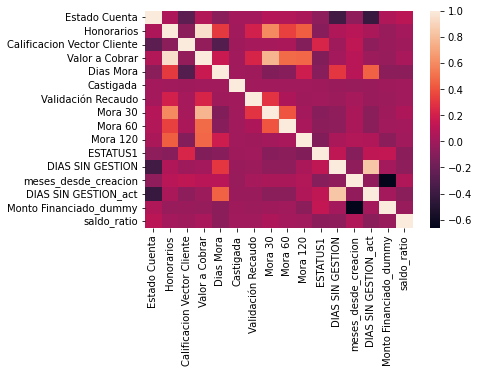

In [9]:
sns.heatmap(igc.corr())

In [10]:
cols=['Valor a Cobrar','Dias Mora',
        'Calificacion Vector Cliente',
        'DIAS SIN GESTION','No. Cuotas Facturadas']
igc['No. Cuotas Facturadas']=pd.to_numeric(igc['No. Cuotas Facturadas'],errors='coerce').fillna(0)
igc['No. Cuotas Facturadas']=igc['No. Cuotas Facturadas'].astype(float)
igc[igc.filter(like='Mora ').columns]=igc[igc.filter(like='Mora ').columns].astype(float)

In [11]:
dic_ges={'COMPROMISO DE PAGO':'PROMESA DE PAGO',
         'MENSAJE CON TERCEROS CASA':'SE DEJO MENSAJE CON TERCERO',
        'PAGO REALIZADO':'YA PAGO','Ã±':'NA'}
igc['Desc_codigo_ult_ges']=igc['Desc_codigo_ult_ges'].str.upper().replace(dic_ges).str.replace('Ã±','N').str.lstrip().str.replace('Ñ','N')
igc['des_traslado']=igc['des_traslado'].str.upper().str.replace('(.*)\_.*', '\\1').str.lstrip()
igc['Autopago'][igc['Autopago']=='Convergente']=np.nan
igc['Autopago'][igc['Autopago']==' ']=np.nan
igc['Tipo Documento']=np.where(igc['Tipo Documento'].isin(['CC','NIT','CE']),igc['Tipo Documento'],"CC")
igc['Canal B2B'][igc['Canal B2B']=='nan']=np.nan
igc['Canal B2B'].fillna('SIN REGISTRO',inplace=True)
igc['Canal B2B'][igc['Canal B2B']=='nan']=np.nan
igc['Canal B2B'].fillna('SIN REGISTRO',inplace=True)
igc['Antiguedad de Producto'][igc['Antiguedad de Producto']=='nan']=np.nan
igc['Antiguedad de Producto'].fillna('SIN REGISTRO',inplace=True)
igc['Marca Portafolio'][igc['Marca Portafolio']=='nan']=np.nan
igc['Marca Portafolio'][igc['Marca Portafolio']=='']=np.nan
igc['Marca Portafolio'].fillna('SIN REGISTRO',inplace=True)
igc['Marca Portafolio']=igc['Marca Portafolio'].str.replace('_',' ')
igc['Tipificacion Cliente'][igc['Tipificacion Cliente']=='nan']='SIN REGISTRO'
igc['Autopago'] = (igc['Autopago']=="TC").astype(int)
#Columna antes de concatenar
antes_consoli=pd.read_csv(r'D:\Proyecto Movil\Modelo 2\columnas_antes_consolidar.csv',sep=',')
lista=antes_consoli['0'].to_list()
lista.remove('Efectivo_data')
igc=igc[lista]
listaa=pd.read_csv(r'D:\Proyecto Movil\Modelo 2\listas_isin_des_ult_ges.csv')
listaa=listaa['0'].to_list()
igc['Desc_codigo_ult_ges']=np.where(igc['Desc_codigo_ult_ges'].isin(listaa),igc['Desc_codigo_ult_ges'],"OTRA GESTION")
listaa2=pd.read_csv(r'D:\Proyecto Movil\Modelo 2\listas_isin_vector.csv')
listaa2=listaa2['0'].to_list()
igc['Analisis Vector']=np.where(igc['Analisis Vector'].isin(listaa2),igc['Analisis Vector'],"OTRO VECTOR")

C:\Users\scadacat\AppData\Local\Temp/ipykernel_11928/1113345845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igc['Autopago'][igc['Autopago']=='Convergente']=np.nan
C:\Users\scadacat\AppData\Local\Temp/ipykernel_11928/1113345845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igc['Autopago'][igc['Autopago']==' ']=np.nan
C:\Users\scadacat\AppData\Local\Temp/ipykernel_11928/1113345845.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [12]:
types = pd.DataFrame(igc.dtypes)
print("Tipos de variables", types.groupby(0).size())

consolidado = igc.replace({False: 0, True: 1})
types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de reemplazo",types.groupby(0).size())

Tipos de variables 0
int32       7
float64    15
object     14
dtype: int64
Tipos de variables luego de reemplazo 0
int32       7
float64    15
object     14
dtype: int64


In [13]:
categoricas = types.index[types[0] == 'O'].values
for line in categoricas:
 print("La variable "+ line +" contiene:",str(len(consolidado[line].unique()))+" distinct values")

La variable Desc_codigo_ult_ges contiene: 12 distinct values
La variable Perfil Digital contiene: 6 distinct values
La variable Vector Cualitativo Contrato contiene: 5 distinct values
La variable Analisis Vector contiene: 16 distinct values
La variable Tipificacion Cliente contiene: 4 distinct values
La variable Edad de Mora contiene: 5 distinct values
La variable Tipo Plan contiene: 7 distinct values
La variable Tipo Inventario contiene: 5 distinct values
La variable Tipo Documento contiene: 3 distinct values
La variable des_traslado contiene: 6 distinct values
La variable Canal B2B contiene: 6 distinct values
La variable Marca Portafolio contiene: 7 distinct values
La variable Antiguedad de Producto contiene: 4 distinct values
La variable Cod. Status Billing contiene: 2 distinct values


In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Se define función que captura el dataframe y la columna para retornar un dataframe luego de OHE
def crea_OneHotEncoding(df, columna):
  le = LabelEncoder()
  le_ajustado=le.fit_transform(df[columna]).reshape(-1,1)
  encoder = OneHotEncoder(sparse=False)
  column = [columna+ "_"+ str(i) for i in le.classes_]
  data = encoder.fit_transform(le_ajustado)
  return(pd.DataFrame(data,columns =column))

In [15]:
numeric_columns = list(set(types.index[types[0] !="Object"].values))
variables_consolidadas = consolidado[numeric_columns]
# objetivo = consolidado["Efectivo_data"]

categoricas = types.index[types[0] == 'O'].values
for column in categoricas:
  df = crea_OneHotEncoding(consolidado,column)
  variables_consolidadas = pd.concat([variables_consolidadas,df],axis=1)
  print("Columna ",column, " transformada!")

print("Tamaño final del dataset transformado:",variables_consolidadas.shape)

Columna  Desc_codigo_ult_ges  transformada!
Columna  Perfil Digital  transformada!
Columna  Vector Cualitativo Contrato  transformada!
Columna  Analisis Vector  transformada!
Columna  Tipificacion Cliente  transformada!
Columna  Edad de Mora  transformada!
Columna  Tipo Plan  transformada!
Columna  Tipo Inventario  transformada!
Columna  Tipo Documento  transformada!
Columna  des_traslado  transformada!
Columna  Canal B2B  transformada!
Columna  Marca Portafolio  transformada!
Columna  Antiguedad de Producto  transformada!
Columna  Cod. Status Billing  transformada!
Tamaño final del dataset transformado: (14417, 124)


In [16]:
# columnas['0'].to_list().remove('Efectivo_data')
# lista=columnas['0'].to_list().remove('Efectivo_data')
# columnas['0'].to_list().remove('Efectivo_data')
# variables_consolidadas[columnas['0'].to_list()]

In [17]:
### Importo igc 
### ------->> 
mobile=pd.read_parquet(r"D:\Proyecto Movil\Modelo 2\df_mobile.parquet.gzip")

In [18]:
qc=mobile['Valor a Cobrar'].quantile(0.982)
variables_consolidadas['Valor a Cobrar']= np.where(variables_consolidadas["Valor a Cobrar"] > qc, qc ,variables_consolidadas["Valor a Cobrar"])
#
pd=mobile['Dias Mora'].quantile(0.99)
variables_consolidadas['Dias Mora']= np.where(variables_consolidadas['Dias Mora'] > pd, pd ,variables_consolidadas['Dias Mora'])
# nv=variables_consolidadas['No. Facturas Vencidas'].quantile(0.99)
# variables_consolidadas['No. Facturas Vencidas']= np.where(variables_consolidadas['No. Facturas Vencidas'] > nv, nv ,variables_consolidadas['No. Facturas Vencidas'])
m14=mobile['DIAS SIN GESTION'].quantile(0.98)
variables_consolidadas['DIAS SIN GESTION']= np.where(variables_consolidadas['DIAS SIN GESTION'] > m14, m14 ,variables_consolidadas['DIAS SIN GESTION'])
m16=mobile['Mora 60'].quantile(0.90)
variables_consolidadas['Mora 60']= np.where(variables_consolidadas['Mora 60'] > m16, m16 ,variables_consolidadas['Mora 60'])

m17=mobile['Mora 120'].quantile(0.90)
variables_consolidadas['Mora 120']= np.where(variables_consolidadas['Mora 120'] > m17, m17 ,variables_consolidadas['Mora 120'])

m30=mobile['Mora 30'].quantile(0.90)
variables_consolidadas['Mora 30']= np.where(variables_consolidadas['Mora 30'] > m30, m30 ,variables_consolidadas['Mora 30'])
m30=mobile['saldo_ratio'].quantile(0.85)
variables_consolidadas['saldo_ratio']= np.where(variables_consolidadas['saldo_ratio'] > m30, m30 ,variables_consolidadas['saldo_ratio'])

In [19]:
variables_consolidadas['meses_desde_creacion'].fillna(variables_consolidadas['meses_desde_creacion'].median(),inplace=True)
variables_consolidadas['saldo_ratio']=variables_consolidadas['saldo_ratio'].replace([np.inf, -np.inf], np.nan)
variables_consolidadas['saldo_ratio'].fillna(variables_consolidadas['saldo_ratio'].median(),inplace=True)
variables_consolidadas['saldo_ratio_log']=(variables_consolidadas['saldo_ratio']+1).transform(np.log).fillna((variables_consolidadas['saldo_ratio']+1).transform(np.log).median())
variables_consolidadas['Dias Mora_log']=(variables_consolidadas['Dias Mora']-variables_consolidadas['Dias Mora'].min()+1).transform(np.log)

In [20]:
# pd.read_csv("D:\Proyecto Movil\Modelo 2\columnas.csv") ### ### "D:\Proyecto Movil\Modelo 2\columnas.csv"

In [21]:
import pandas as pd
columnas=pd.read_csv(r"D:\Proyecto Movil\Modelo 2\columnas.csv",sep=';',encoding='utf-8',nrows=10)

In [22]:
columnas2=pd.read_csv(r"D:\Proyecto Movil\Modelo 2\columnas.csv")

In [23]:
# lista=train_data_X.columns.to_list()
lista=columnas2['0'].to_list()
# lista.remove('Unnamed: 0')
d=(set(lista)-set(variables_consolidadas.columns))
# lista=train_data_X.columns.to_list()
lista=columnas2['0'].to_list()
# lista.remove('Unnamed: 0')
d=(set(lista)-set(variables_consolidadas.columns))

In [24]:
dictionary = dict.fromkeys(d, 0)
pd.DataFrame(dictionary.items()).T#.reset_index()
dictionary=pd.DataFrame(dictionary.items()).T
dictionary  = dictionary[dictionary.index.isin([0])]
dictionary=pd.DataFrame(dictionary,columns=list(d))
dictionary.dropna(inplace=True)
variables_consolidadas=pd.concat([variables_consolidadas,dictionary],axis=1)

In [25]:
# variables_consolidadas.dropna(subset=['Marca Portafolio'],inplace=True)

In [26]:
variables_consolidadas[dictionary.columns]=variables_consolidadas[dictionary.columns].fillna(0)

In [27]:
scaler = StandardScaler()
variables_consolidadas[['Calificacion Vector Cliente','DIAS SIN GESTION_act',
    'DIAS SIN GESTION','Mora 60','Mora 120','Mora 30','saldo_ratio',
    'Dias Mora','meses_desde_creacion','Valor a Cobrar']]=\
        scaler.fit_transform(
            variables_consolidadas[['Calificacion Vector Cliente','DIAS SIN GESTION_act',
    'DIAS SIN GESTION','Mora 60','Mora 120','Mora 30','saldo_ratio',
    'Dias Mora','meses_desde_creacion',
  'Valor a Cobrar']])

In [28]:
# variables_consolidadas.drop(['Canal B2B_SIN REGISTRO',
#                             'Canal B2B_SIN REGISTRO','Tipo Inventario_Cliente B2B',
#                             'Cod. Status Billing_10103','Desc_codigo_ult_ges_PROMESA DE PAGO','Antiguedad de Producto_Antigua',
#                             'Tipo Documento_NIT','Analisis Vector_PAGO OPORTUNO','Cod. Status Billing_10102',
#                             'des_traslado_Prejuridica 120','Tipificacion Cliente_SIN REGISTRO',
#                             'Desc_codigo_ult_ges_RETIRO POR CUMPLIMIENTO DE CRITERIOS','Tipificacion Cliente_SERVICIO RETIRADO',
#                             'Tipo Documento_NIT','Tipo Inventario_Tradicional',
#                             'Mora 60','Mora 30','Tipo Documento_CC',
#                             'Analisis Vector_SIN VECTOR','Edad de Mora_Mora > 360','Vector Cualitativo Contrato_SIN COMPORTAMIENTO',
#                             'Canal B2B_MICRO/SMALL','Edad de Mora_Mora 120','Mora 270','Mora 240',
#                             'Desc_codigo_ult_ges_RETIRO POR CUMPLIMIENTO DE CRITERIOS','Autopago_nan'],axis=1,inplace=True)
# variables_consolidadas.drop(categoricas,axis=1,inplace=True)

In [29]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score,make_scorer
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV,train_test_split,cross_val_score,KFold,GridSearchCV
import pickle
os.chdir(r"D:\Proyecto Movil\Modelo 2")
xgb_model_loaded = XGBClassifier(seed=10)

file_name="xgb_mod_v2.pkl"

xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [30]:
variables_consolidadas.drop(list(set(columnas2['0'].to_list())-set(variables_consolidadas.columns)),axis=1,inplace=True)
variables_consolidadas.drop(categoricas,axis=1,inplace=True)

In [31]:
# list(set(variables_consolidadas.columns)-set(columnas.columns))
# variables_consolidadas.drop(list(set(variables_consolidadas.columns)-set(columnas.columns)),axis=1,inplace=True)
# set(variables_consolidadas.columns)-set(columnas.columns)
# xgb_model_loaded.predict_proba(variables_consolidadas)[:,1]
# variables_consolidadas.drop([',0'],axis=1,inplace=True)

In [32]:
prediction=xgb_model_loaded.predict_proba(variables_consolidadas[lista])[:,1]

In [33]:
variables_consolidadas.shape

(14417, 137)

In [34]:
variables_consolidadas['pred']=prediction

In [35]:
# variables_consolidadas[variables_consolidadas.filter(like='Desc_codigo').columns]

<AxesSubplot:>

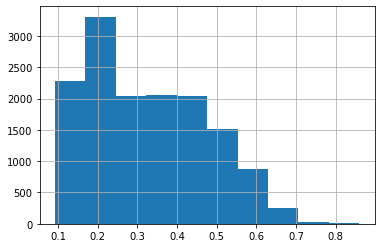

In [36]:
variables_consolidadas['pred'].hist()

In [37]:
igc = open_files_hoy([path]) 

Y:/Stiven/Movil/Cobranzas_movil_(Despliegue)/Download_folder_Adminfo/20211229_IGC.zip Cargado!


In [38]:
igc[['Referencia Pago','Movil','Identificación','Calificacion Vector Servicio','Analisis Vector']].head(1)

,Referencia Pago,Movil,Identificación,Calificacion Vector Servicio,Analisis Vector
0,8925747780,3005550305,71365056,42,3 SUSPENSION ULTIMOS 6 MESES


In [40]:
df=pd.concat([igc[['Referencia Pago','Movil','Identificación']],variables_consolidadas['pred']],axis=1)

In [42]:
path="Y:\Stiven\Movil\Cobranzas_movil_(Despliegue)\Salidas\Modelo_v1_mobile{}.csv".format(now)

In [43]:
df.to_csv(path,sep=';',encoding='utf-8')